--- Systemic Concentration Summary ---
Total Market USDT Debt: $4,272,024,802.00
Top 50 Whales Debt: $2,732,147,115.00
Concentration Ratio: 63.95%
Audit Verdict: High Concentration


C:\Users\kelvi\AppData\Local\Temp\ipykernel_27692\3352528798.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


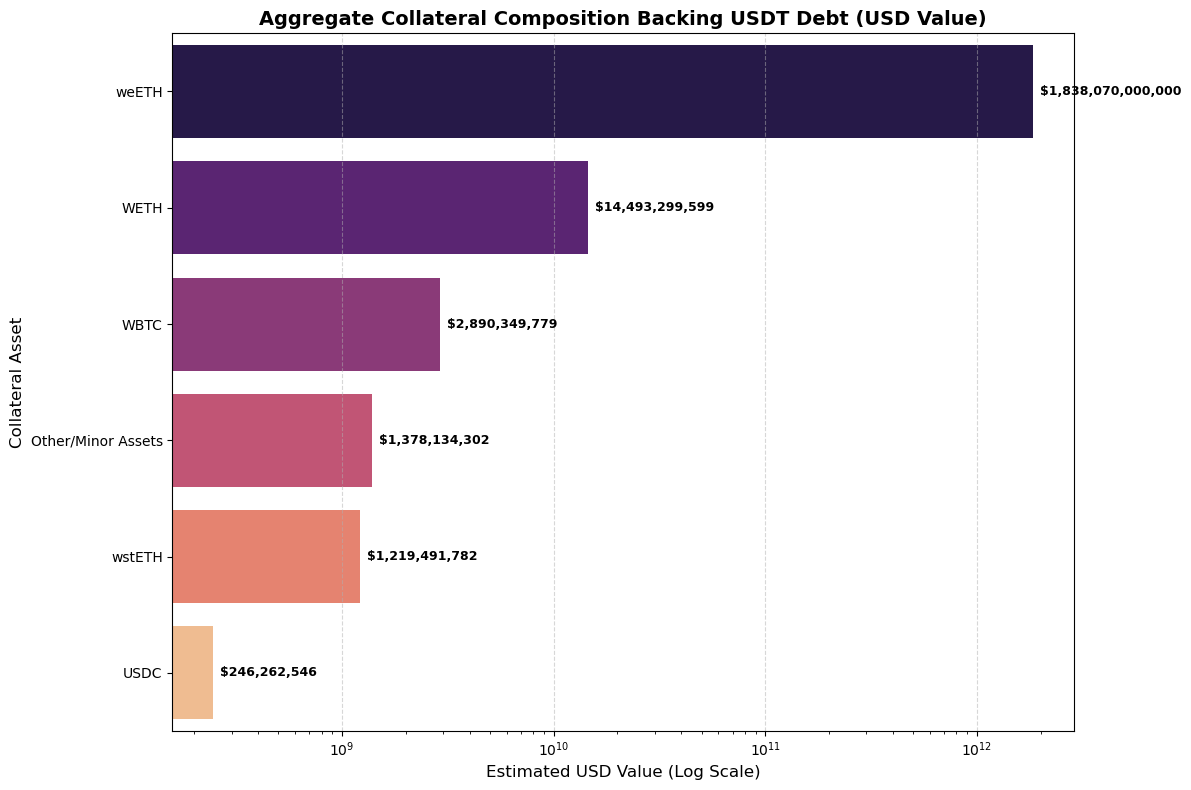


--- Forensic Conclusion ---
CRITICAL: Systemic concentration is 63.95%.
The top 50 borrowers control the majority of the market's liquidation risk.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Audit Datasets ---
# 07: Focuses on debt concentration among top 50 whales
# 08: Focuses on the aggregate collateral backing that debt
df_concentration = pd.read_csv('07_systemic_concentration_audit (limit 50).csv')
df_collateral = pd.read_csv('08_aggregate_collateral_composition.csv')

# --- 2. Debt Concentration Analysis (File 07) ---
# Extracting key metrics from the audit summary
total_market_debt = df_concentration['global_usdt_debt'].iloc[0]
whale_debt_total = df_concentration['whales_50_debt'].iloc[0]
concentration_ratio = df_concentration['top_50_ratio_percentage'].iloc[0]
audit_verdict = df_concentration['audit_verdict'].iloc[0]

print(f"--- Systemic Concentration Summary ---")
print(f"Total Market USDT Debt: ${total_market_debt:,.2f}")
print(f"Top 50 Whales Debt: ${whale_debt_total:,.2f}")
print(f"Concentration Ratio: {concentration_ratio}%")
print(f"Audit Verdict: {audit_verdict}")

# --- 3. Visualization: Collateral Composition (File 08) ---
# Sorting assets by USD value to identify the largest risk drivers
df_collateral_sorted = df_collateral.sort_values('estimated_usd_value', ascending=False)

plt.figure(figsize=(12, 8))
# Horizontal bar chart for clear asset labeling
ax = sns.barplot(
    x='estimated_usd_value', 
    y='representative_token', 
    data=df_collateral_sorted, 
    palette='magma'
)

# Apply Log Scale to handle the massive difference between weETH and other assets
plt.xscale('log') 

plt.title('Aggregate Collateral Composition Backing USDT Debt (USD Value)', fontsize=14, fontweight='bold')
plt.xlabel('Estimated USD Value (Log Scale)', fontsize=12)
plt.ylabel('Collateral Asset', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# --- FIXED: Corrected Annotation Logic ---
# Adding text labels to the end of each bar using xytext for padding
for i, p in enumerate(ax.patches):
    val = df_collateral_sorted.iloc[i]['estimated_usd_value']
    # Use textcoords='offset points' and xytext=(5, 0) to add horizontal padding
    ax.annotate(f'${val:,.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords='offset points', 
                va='center', 
                fontsize=9, 
                color='black',
                fontweight='bold')

plt.tight_layout()
plt.savefig('collateral_composition_audit.png')
plt.show()

# --- 4. Actuarial Risk Assessment ---
print(f"\n--- Forensic Conclusion ---")
if concentration_ratio > 50:
    print(f"CRITICAL: Systemic concentration is {concentration_ratio}%.")
    print(f"The top 50 borrowers control the majority of the market's liquidation risk.")
else:
    print(f"The protocol shows a healthy, distributed debt profile.")